In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from config import am_key

In [2]:
# Import Jan CSV
Jan_stops_df = pd.read_csv(r"C:\Users\crist\Desktop\group_project1\CC\Jan2020VMBusStops.csv","utf-8", engine='python', delimiter = ",")
Jan_stops_df

,SERVICE,ROUTE,CITY,Avg Full Fare,Avg Exp Fare,Avg Reduced Fare,Avg Full Fare Pass,Avg Reduced Pass,Avg Monthly Pass,Avg Free,Avg Bikes,Avg W/C,Avg Daily Boardings,Total Boardings,Daily Revenue Miles,Total Rev. Miles,Boardings Per Rev Mile,1/19 - Avg Daily,% Difference
0,WK,Valley Metro Rail,Mes,161,0,218,"2,802","3,496",467,836,0,0,"7,980","175,538","2,099.10","46,180.20",3.8,"6,928",15.20%
1,WK,Valley Metro Rail,Phx,741,0,601,"9,943","11,726","2,690","3,006",0,0,"28,707","631,579","6,026.80","132,589.60",4.8,"30,530",-6.00%
2,WK,Valley Metro Rail,Tem,332,0,276,"2,716","3,354","1,732",984,0,0,"9,394","206,657","2,009.90","44,217.80",4.7,"9,883",-4.90%
3,SA,Valley Metro Rail,Mes,122,0,165,"2,117","2,642",353,632,0,0,"6,031","24,115","1,970.60","7,882.40",3.1,"5,424",11.20%
4,SA,Valley Metro Rail,Phx,527,0,427,"7,065","8,331","1,911","2,132",0,0,"20,393","81,588","5,657.80","22,631.20",3.6,"22,333",-8.70%
5,SA,Valley Metro Rail,Tem,225,0,187,"1,837","2,268","1,171",665,0,0,"6,353","25,407","1,886.90","7,547.60",3.4,"6,619",-4.00%
6,SU,Valley Metro Rail,Mes,106,0,144,1854,2313,309,553,0,0,"5,279","26,395","1,435.10","7,175.50",3.7,"4,407",19.80%
7,SU,Valley Metro Rail,Phx,445,0,361,5974,7045,1616,1808,0,0,"17,249","86,242","4,120.30","20,601.50",4.2,"17,810",-3.10%
8,SU,Valley Metro Rail,Tem,187,0,156,1529,1888,975,554,0,0,"5,289","26,446","1,374.10","6,870.50",3.8,"5,332",-0.80%


In [3]:
vm_jan_stops_df = Jan_stops_df.drop(['Avg Full Fare', 'Avg Exp Fare', 'Avg Reduced Fare', 'Avg Full Fare Pass', 'Avg Reduced Pass', 'Avg Monthly Pass', 'Avg Free', 'Avg Bikes', 'Avg W/C', 'Boardings Per Rev Mile'], axis=1)
vm_jan_stops_df

,SERVICE,ROUTE,CITY,Avg Daily Boardings,Total Boardings,Daily Revenue Miles,Total Rev. Miles,1/19 - Avg Daily,% Difference
0,WK,Valley Metro Rail,Mes,"7,980","175,538","2,099.10","46,180.20","6,928",15.20%
1,WK,Valley Metro Rail,Phx,"28,707","631,579","6,026.80","132,589.60","30,530",-6.00%
2,WK,Valley Metro Rail,Tem,"9,394","206,657","2,009.90","44,217.80","9,883",-4.90%
3,SA,Valley Metro Rail,Mes,"6,031","24,115","1,970.60","7,882.40","5,424",11.20%
4,SA,Valley Metro Rail,Phx,"20,393","81,588","5,657.80","22,631.20","22,333",-8.70%
5,SA,Valley Metro Rail,Tem,"6,353","25,407","1,886.90","7,547.60","6,619",-4.00%
6,SU,Valley Metro Rail,Mes,"5,279","26,395","1,435.10","7,175.50","4,407",19.80%
7,SU,Valley Metro Rail,Phx,"17,249","86,242","4,120.30","20,601.50","17,810",-3.10%
8,SU,Valley Metro Rail,Tem,"5,289","26,446","1,374.10","6,870.50","5,332",-0.80%


In [4]:
# Import Feb CSV
Feb_stops_df = pd.read_csv(r"C:\Users\crist\Desktop\group_project1\CC\Feb2020VMBusStops.csv","utf-8", engine='python', delimiter = ",")
Feb_stops_df

,SERVICE,ROUTE,CITY,Avg Full Fare,Avg Exp Fare,Avg Reduced Fare,Avg Full Fare Pass,Avg Reduced Pass,Avg Monthly Pass,Avg Free,Avg Bikes,Avg W/C,Avg Daily Boardings,Total Boardings,Daily Revenue Miles,Total Rev. Miles,Boardings Per Rev Mile,2/19 - Avg Daily,% Difference
0,WK,Valley Metro Rail,Mes,172,0,216,"2,938","3,828",534,785,0,0,"8,473","169,449","2,117.80","42,356.00",4.0,"6,815",24.30%
1,WK,Valley Metro Rail,Phx,774,0,610,"10,227","12,853","2,780","2,782",0,0,"30,026","600,524","6,080.50","121,610.00",4.9,"30,144",-0.40%
2,WK,Valley Metro Rail,Tem,372,0,304,"2,945","3,814","2,263",991,0,0,"10,689","213,783","2,027.90","40,558.00",5.3,"10,104",5.80%
3,SA,Valley Metro Rail,Mes,133,0,167,"2,269","2,957",412,606,0,0,"6,544","32,718","1,988.20","9,941.00",3.3,"5,687",15.10%
4,SA,Valley Metro Rail,Phx,575,0,453,"7,592","9,541","2,064","2,063",0,0,"22,288","111,447","5,708.20","28,541.00",3.9,"22,611",-1.40%
5,SA,Valley Metro Rail,Tem,239,0,196,"1,894","2,452","1,455",637,0,0,"6,873","34,361","1,903.70","9,518.50",3.6,"6,542",5.10%
6,SU,Valley Metro Rail,Mes,113,0,142,1928,2512,350,515,0,0,"5,560","22,241","1,447.90","5,791.60",3.8,"4,233",31.30%
7,SU,Valley Metro Rail,Phx,475,0,374,6268,7878,1704,1704,0,0,"18,403","73,611","4,157.10","16,628.40",4.4,"17,246",6.70%
8,SU,Valley Metro Rail,Tem,186,0,152,1470,1903,1129,494,0,0,"5,334","21,337","1,386.40","5,545.60",3.8,"5,358",-0.40%


In [5]:
vm_feb_stops_df = Feb_stops_df.drop(['Avg Full Fare', 'Avg Exp Fare', 'Avg Reduced Fare', 'Avg Full Fare Pass', 'Avg Reduced Pass', 'Avg Monthly Pass', 'Avg Free', 'Avg Bikes', 'Avg W/C', 'Boardings Per Rev Mile'], axis=1)
vm_feb_stops_df

,SERVICE,ROUTE,CITY,Avg Daily Boardings,Total Boardings,Daily Revenue Miles,Total Rev. Miles,2/19 - Avg Daily,% Difference
0,WK,Valley Metro Rail,Mes,"8,473","169,449","2,117.80","42,356.00","6,815",24.30%
1,WK,Valley Metro Rail,Phx,"30,026","600,524","6,080.50","121,610.00","30,144",-0.40%
2,WK,Valley Metro Rail,Tem,"10,689","213,783","2,027.90","40,558.00","10,104",5.80%
3,SA,Valley Metro Rail,Mes,"6,544","32,718","1,988.20","9,941.00","5,687",15.10%
4,SA,Valley Metro Rail,Phx,"22,288","111,447","5,708.20","28,541.00","22,611",-1.40%
5,SA,Valley Metro Rail,Tem,"6,873","34,361","1,903.70","9,518.50","6,542",5.10%
6,SU,Valley Metro Rail,Mes,"5,560","22,241","1,447.90","5,791.60","4,233",31.30%
7,SU,Valley Metro Rail,Phx,"18,403","73,611","4,157.10","16,628.40","17,246",6.70%
8,SU,Valley Metro Rail,Tem,"5,334","21,337","1,386.40","5,545.60","5,358",-0.40%


In [6]:
# Import March CSV
March_stops_df = pd.read_csv(r"C:\Users\crist\Desktop\group_project1\CC\Mar2020VMBusStops.csv","utf-8", engine='python', delimiter = ",")
March_stops_df

,SERVICE,ROUTE,CITY,Avg Full Fare,Avg Exp Fare,Avg Reduced Fare,Avg Full Fare Pass,Avg Reduced Pass,Avg Monthly Pass,Avg Free,Avg Bikes,Avg W/C,Avg Daily Boardings,Total Boardings,Daily Revenue Miles,Total Rev. Miles,Boardings Per Rev Mile,3/19 - Avg Daily,% Difference
0,WK,Valley Metro Rail,Mes,119,0,165,"2,109","2,603",261,544,0,0,"5,801","127,625","2,107","46,361",3,"6,730",-13.80%
1,WK,Valley Metro Rail,Phx,424,0,389,"7,866","9,562","1,397","2,032",0,0,"21,670","476,719","6,050","133,107",4,"30,246",-28.40%
2,WK,Valley Metro Rail,Tem,203,0,167,"2,210","2,696",768,625,0,0,"6,669","146,727","2,018","44,392",3,"9,632",-30.80%
3,SA,Valley Metro Rail,Mes,102,0,143,"1,816","2,241",224,468,0,0,"4,994","19,978","1,978","7,913",3,"5,926",-15.70%
4,SA,Valley Metro Rail,Phx,341,0,313,"6,325","7,689","1,124","1,633",0,0,"17,425","69,698","5,680","22,720",3,"24,771",-29.70%
5,SA,Valley Metro Rail,Tem,152,0,125,"1,645","2,006",572,465,0,0,"4,965","19,855","1,894","7,577",3,"7,830",-36.60%
6,SU,Valley Metro Rail,Mes,87,0,120,"1,535","1,894",190,396,0,0,"4,222","21,103","1,441","7,204",3,"4,638",-9.00%
7,SU,Valley Metro Rail,Phx,292,0,268,"5,424","6,594",964,"1,399",0,0,"14,941","74,711","4,137","20,683",4,"18,811",-20.60%
8,SU,Valley Metro Rail,Tem,147,0,121,"1,599","1,950",555,452,0,0,"4,824","24,121","1,380","6,898",4,"6,661",-27.60%


In [7]:
vm_march_stops_df = March_stops_df.drop(['Avg Full Fare', 'Avg Exp Fare', 'Avg Reduced Fare', 'Avg Full Fare Pass', 'Avg Reduced Pass', 'Avg Monthly Pass', 'Avg Free', 'Avg Bikes', 'Avg W/C', 'Boardings Per Rev Mile'], axis=1)
vm_march_stops_df

,SERVICE,ROUTE,CITY,Avg Daily Boardings,Total Boardings,Daily Revenue Miles,Total Rev. Miles,3/19 - Avg Daily,% Difference
0,WK,Valley Metro Rail,Mes,"5,801","127,625","2,107","46,361","6,730",-13.80%
1,WK,Valley Metro Rail,Phx,"21,670","476,719","6,050","133,107","30,246",-28.40%
2,WK,Valley Metro Rail,Tem,"6,669","146,727","2,018","44,392","9,632",-30.80%
3,SA,Valley Metro Rail,Mes,"4,994","19,978","1,978","7,913","5,926",-15.70%
4,SA,Valley Metro Rail,Phx,"17,425","69,698","5,680","22,720","24,771",-29.70%
5,SA,Valley Metro Rail,Tem,"4,965","19,855","1,894","7,577","7,830",-36.60%
6,SU,Valley Metro Rail,Mes,"4,222","21,103","1,441","7,204","4,638",-9.00%
7,SU,Valley Metro Rail,Phx,"14,941","74,711","4,137","20,683","18,811",-20.60%
8,SU,Valley Metro Rail,Tem,"4,824","24,121","1,380","6,898","6,661",-27.60%


In [8]:
# Import April CSV
April_stops_df = pd.read_csv(r"C:\Users\crist\Desktop\group_project1\CC\Apr2020VMBusStops.csv","utf-8", engine='python', delimiter = ",")
April_stops_df

,SERVICE,ROUTE,CITY,Avg Full Fare,Avg Exp Fare,Avg Reduced Fare,Avg Full Fare Pass,Avg Reduced Pass,Avg Monthly Pass,Avg Free,Avg Bikes,Avg W/C,Avg Daily Boardings,Total Boardings,Daily Revenue Miles,Total Rev. Miles,Boardings Per Rev Mile,4/19 - Avg Daily,% Difference
0,WK,Valley Metro Rail,Mes,58,0,94,"1,467","1,943",64,370,0,0,"3,996","87,918","1,117","24,583",4,"6,624",-39.70%
1,WK,Valley Metro Rail,Phx,101,0,152,"4,795","6,350",268,"1,192",0,0,"12,858","282,879","3,208","70,578",4,"30,118",-57.30%
2,WK,Valley Metro Rail,Tem,51,0,70,"1,358","1,798",81,343,0,0,"3,701","81,410","1,070","23,538",4,"9,780",-62.20%
3,SA,Valley Metro Rail,Mes,51,0,82,"1,286","1,702",56,324,0,0,"3,501","14,002","1,077","4,308",3,"5,941",-41.10%
4,SA,Valley Metro Rail,Phx,90,0,135,"4,258","5,639",238,"1,056",0,0,"11,416","45,667","3,092","12,368",4,"24,890",-54.10%
5,SA,Valley Metro Rail,Tem,44,0,61,"1,175","1,556",70,297,0,0,"3,203","12,809","1,031","4,125",3,"8,300",-61.40%
6,SU,Valley Metro Rail,Mes,44,0,71,"1,112","1,472",49,281,0,0,"3,029","12,109",846,"3,386",4,"4,450",-31.90%
7,SU,Valley Metro Rail,Phx,77,0,116,"3,667","4,856",205,909,0,0,"9,830","39,325","2,430","9,720",4,"19,309",-49.10%
8,SU,Valley Metro Rail,Tem,38,0,52,"1,015","1,344",61,256,0,0,"2,766","11,064",810,"3,242",3,"5,202",-46.80%


In [9]:
vm_april_stops_df = April_stops_df.drop(['Avg Full Fare', 'Avg Exp Fare', 'Avg Reduced Fare', 'Avg Full Fare Pass', 'Avg Reduced Pass', 'Avg Monthly Pass', 'Avg Free', 'Avg Bikes', 'Avg W/C', 'Boardings Per Rev Mile'], axis=1)
vm_april_stops_df

,SERVICE,ROUTE,CITY,Avg Daily Boardings,Total Boardings,Daily Revenue Miles,Total Rev. Miles,4/19 - Avg Daily,% Difference
0,WK,Valley Metro Rail,Mes,"3,996","87,918","1,117","24,583","6,624",-39.70%
1,WK,Valley Metro Rail,Phx,"12,858","282,879","3,208","70,578","30,118",-57.30%
2,WK,Valley Metro Rail,Tem,"3,701","81,410","1,070","23,538","9,780",-62.20%
3,SA,Valley Metro Rail,Mes,"3,501","14,002","1,077","4,308","5,941",-41.10%
4,SA,Valley Metro Rail,Phx,"11,416","45,667","3,092","12,368","24,890",-54.10%
5,SA,Valley Metro Rail,Tem,"3,203","12,809","1,031","4,125","8,300",-61.40%
6,SU,Valley Metro Rail,Mes,"3,029","12,109",846,"3,386","4,450",-31.90%
7,SU,Valley Metro Rail,Phx,"9,830","39,325","2,430","9,720","19,309",-49.10%
8,SU,Valley Metro Rail,Tem,"2,766","11,064",810,"3,242","5,202",-46.80%


In [10]:
# Import May CSV
May_stops_df = pd.read_csv(r"C:\Users\crist\Desktop\group_project1\CC\May2020VMBusStops.csv","utf-8", engine='python', delimiter = ",")
May_stops_df

,SERVICE,ROUTE,CITY,Avg Full Fare,Avg Exp Fare,Avg Reduced Fare,Avg Full Fare Pass,Avg Reduced Pass,Avg Monthly Pass,Avg Free,Avg Bikes,Avg W/C,Avg Daily Boardings,Total Boardings,Daily Revenue Miles,Total Rev. Miles,Boardings Per Rev Mile,5/19 - Avg Daily,% Difference
0,WK,Valley Metro Rail,Mes,93,0,184,"1,358","1,799",62,357,0,0,"3,853","77,074","1,719","34,376",2,"6,805",-43.40%
1,WK,Valley Metro Rail,Phx,189,0,274,"4,666","6,179",276,"1,185",0,0,"12,769","255,335","4,935","98,694",3,"29,512",-56.70%
2,WK,Valley Metro Rail,Tem,95,0,139,"1,307","1,731",73,342,0,0,"3,687","73,764","1,646","32,914",2,"8,013",-54.00%
3,SU,Valley Metro Rail,Mes,74,0,146,"1,077","1,427",50,283,0,0,"3,057","18,340","1,515","9,091",2,"4,674",-34.60%
4,SU,Valley Metro Rail,Phx,142,0,206,"3,501","4,636",207,886,0,0,"9,578","57,472","4,350","26,102",2,"18,295",-47.60%
5,SU,Valley Metro Rail,Tem,73,0,107,"1,002","1,327",56,262,0,0,"2,827","16,958","1,451","8,705",2,"4,736",-40.30%


In [11]:
vm_may_stops_df = May_stops_df.drop(['Avg Full Fare', 'Avg Exp Fare', 'Avg Reduced Fare', 'Avg Full Fare Pass', 'Avg Reduced Pass', 'Avg Monthly Pass', 'Avg Free', 'Avg Bikes', 'Avg W/C', 'Boardings Per Rev Mile'], axis=1)
vm_may_stops_df

,SERVICE,ROUTE,CITY,Avg Daily Boardings,Total Boardings,Daily Revenue Miles,Total Rev. Miles,5/19 - Avg Daily,% Difference
0,WK,Valley Metro Rail,Mes,"3,853","77,074","1,719","34,376","6,805",-43.40%
1,WK,Valley Metro Rail,Phx,"12,769","255,335","4,935","98,694","29,512",-56.70%
2,WK,Valley Metro Rail,Tem,"3,687","73,764","1,646","32,914","8,013",-54.00%
3,SU,Valley Metro Rail,Mes,"3,057","18,340","1,515","9,091","4,674",-34.60%
4,SU,Valley Metro Rail,Phx,"9,578","57,472","4,350","26,102","18,295",-47.60%
5,SU,Valley Metro Rail,Tem,"2,827","16,958","1,451","8,705","4,736",-40.30%


In [12]:
# Import June CSV
June_stops_df = pd.read_csv(r"C:\Users\crist\Desktop\group_project1\CC\Jun2020VMBusStops.csv","utf-8", engine='python', delimiter = ",")
June_stops_df

,SERVICE,ROUTE,CITY,Avg Full Fare,Avg Exp Fare,Avg Reduced Fare,Avg Full Fare Pass,Avg Reduced Pass,Avg Monthly Pass,Avg Free,Avg Bikes,Avg W/C,Avg Daily Boardings,Total Boardings,Daily Revenue Miles,Total Rev. Miles,Boardings Per Rev Mile,6/19 - Avg Daily,% Difference
0,WK,Valley Metro Rail,Mes,107.0,0.0,192.0,848,"1,601",84.0,782,0.0,0.0,"3,614","79,490","1,719","37,814",2.0,"6,991",-48.30%
1,WK,Valley Metro Rail,Phx,221.0,0.0,302.0,"2,951","5,575",358.0,"2,594",0.0,0.0,"12,001","264,049","4,935","108,563",2.0,"27,083",-55.70%
2,WK,Valley Metro Rail,Tem,108.0,0.0,155.0,835,"1,578",97.0,765,0.0,0.0,"3,538","77,827","1,646","36,205",2.0,"7,434",-52.40%
3,SU,Valley Metro Rail,Mes,81.0,0.0,145.0,640,"1,209",63.0,590,0.0,0.0,"2,728","10,909","1,515","6,061",2.0,"4,566",-40.30%
4,SU,Valley Metro Rail,Phx,165.0,0.0,225.0,"2,198","4,151",266.0,"1,931",0.0,0.0,"8,936","35,751","4,350","17,401",2.0,"16,863",-47.00%
5,SU,Valley Metro Rail,Tem,81.0,0.0,116.0,627,"1,184",73.0,574,0.0,0.0,"2,655","10,619","1,451","5,803",2.0,"4,405",-39.70%
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
vm_june_stops_df = June_stops_df.drop(['Avg Full Fare', 'Avg Exp Fare', 'Avg Reduced Fare', 'Avg Full Fare Pass', 'Avg Reduced Pass', 'Avg Monthly Pass', 'Avg Free', 'Avg Bikes', 'Avg W/C', 'Boardings Per Rev Mile'], axis=1)
vm_june_stops_df

,SERVICE,ROUTE,CITY,Avg Daily Boardings,Total Boardings,Daily Revenue Miles,Total Rev. Miles,6/19 - Avg Daily,% Difference
0,WK,Valley Metro Rail,Mes,"3,614","79,490","1,719","37,814","6,991",-48.30%
1,WK,Valley Metro Rail,Phx,"12,001","264,049","4,935","108,563","27,083",-55.70%
2,WK,Valley Metro Rail,Tem,"3,538","77,827","1,646","36,205","7,434",-52.40%
3,SU,Valley Metro Rail,Mes,"2,728","10,909","1,515","6,061","4,566",-40.30%
4,SU,Valley Metro Rail,Phx,"8,936","35,751","4,350","17,401","16,863",-47.00%
5,SU,Valley Metro Rail,Tem,"2,655","10,619","1,451","5,803","4,405",-39.70%
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# Import Final Jan-Jun CSV
Final_stops_df = pd.read_csv(r"C:\Users\crist\Desktop\group_project1\CC\FinalJanJun2020VMBusStops.csv","utf-8", engine='python', delimiter = ",")
Final_stops_df

,Month,ROUTE,CITY,Avg Full Fare,Avg Exp Fare,Avg Reduced Fare,Avg Full Fare Pass,Avg Reduced Pass,Avg Monthly Pass,Avg Free,Avg Bikes,Avg W/C,Avg Daily Boardings,Total Boardings,Daily Revenue Miles,Total Rev. Miles,Boardings Per Rev Mile,2019 - Avg Daily,% Difference
0,Jan,Valley Metro Rail,Mesa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"19,290","226,048","5,505","61,238",10.6,"16,759",46%
1,Jan,Valley Metro Rail,Phoenix,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"66,349","799,409","15,805","175,822",12.6,"70,673",-18%
2,Jan,Valley Metro Rail,Tempe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"21,036","258,510","5,271","58,636",11.9,"21,834",-10%
3,Feb,Valley Metro Rail,Mesa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"20,577","224,408","5,554","58,089",11.0,"16,735",71%
4,Feb,Valley Metro Rail,Phoenix,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"70,717","785,582","15,946","166,779",13.0,"70,001",5%
5,Feb,Valley Metro Rail,Tempe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"22,896","269,481","5,318","55,622",13.0,"22,004",11%
6,March,Valley Metro Rail,Mesa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"15,017","168,706","5,526","61,478",9.0,"17,294",-39%
7,March,Valley Metro Rail,Phoenix,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"54,036","621,128","15,867","176,510",11.0,"73,828",-79%
8,March,Valley Metro Rail,Tempe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"16,458","190,703","5,292","58,867",10.0,"24,123",-95%
9,April,Valley Metro Rail,Mesa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"10,526","114,029","3,040","32,277",11.0,"17,015",-113%


In [15]:
Final_JanJun_stops_df = Final_stops_df.drop(['Avg Full Fare', 'Avg Exp Fare', 'Avg Reduced Fare', 'Avg Full Fare Pass', 'Avg Reduced Pass', 'Avg Monthly Pass', 'Avg Free', 'Avg Bikes', 'Avg W/C', 'Boardings Per Rev Mile'], axis=1)
Final_JanJun_stops_df

,Month,ROUTE,CITY,Avg Daily Boardings,Total Boardings,Daily Revenue Miles,Total Rev. Miles,2019 - Avg Daily,% Difference
0,Jan,Valley Metro Rail,Mesa,"19,290","226,048","5,505","61,238","16,759",46%
1,Jan,Valley Metro Rail,Phoenix,"66,349","799,409","15,805","175,822","70,673",-18%
2,Jan,Valley Metro Rail,Tempe,"21,036","258,510","5,271","58,636","21,834",-10%
3,Feb,Valley Metro Rail,Mesa,"20,577","224,408","5,554","58,089","16,735",71%
4,Feb,Valley Metro Rail,Phoenix,"70,717","785,582","15,946","166,779","70,001",5%
5,Feb,Valley Metro Rail,Tempe,"22,896","269,481","5,318","55,622","22,004",11%
6,March,Valley Metro Rail,Mesa,"15,017","168,706","5,526","61,478","17,294",-39%
7,March,Valley Metro Rail,Phoenix,"54,036","621,128","15,867","176,510","73,828",-79%
8,March,Valley Metro Rail,Tempe,"16,458","190,703","5,292","58,867","24,123",-95%
9,April,Valley Metro Rail,Mesa,"10,526","114,029","3,040","32,277","17,015",-113%


In [16]:
# Import Tempe Jan-Jun CSV
Tempe_stops_df = pd.read_csv(r"C:\Users\crist\Desktop\group_project1\CC\TempeJanJunBusStops2020.csv","utf-8", engine='python', delimiter = ",")
Tempe_stops_df

,Month,ROUTE,CITY,Avg Full Fare,Avg Exp Fare,Avg Reduced Fare,Avg Full Fare Pass,Avg Reduced Pass,Avg Monthly Pass,Avg Free,Avg Bikes,Avg W/C,Avg Daily Boardings,Total Boardings,Daily Revenue Miles,Total Rev. Miles,Boardings Per Rev Mile,2019 - Avg Daily,% Difference
0,Jan,Valley Metro Rail,Tempe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"21,036","258,510","5,271","58,636",11.9,"21,834",-10%
1,Feb,Valley Metro Rail,Tempe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"22,896","269,481","5,318","55,622",13.0,"22,004",11%
2,March,Valley Metro Rail,Tempe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"16,458","190,703","5,292","58,867",10.0,"24,123",-95%
3,April,Valley Metro Rail,Tempe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"9,670","105,283","2,911","30,905",10.0,"23,282",-170%
4,May,Valley Metro Rail,Tempe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"6,514","90,722","3,097","41,619",4.0,"12,749",-94%
5,June,Valley Metro Rail,Tempe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"6,193","88,446","3,097","42,008",4.0,"11,839",-92%


In [17]:
Tempe_JanJun_stops_df = Tempe_stops_df.drop(['Avg Full Fare', 'Avg Exp Fare', 'Avg Reduced Fare', 'Avg Full Fare Pass', 'Avg Reduced Pass', 'Avg Monthly Pass', 'Avg Free', 'Avg Bikes', 'Avg W/C', 'Boardings Per Rev Mile'], axis=1)
Tempe_JanJun_stops_df

,Month,ROUTE,CITY,Avg Daily Boardings,Total Boardings,Daily Revenue Miles,Total Rev. Miles,2019 - Avg Daily,% Difference
0,Jan,Valley Metro Rail,Tempe,"21,036","258,510","5,271","58,636","21,834",-10%
1,Feb,Valley Metro Rail,Tempe,"22,896","269,481","5,318","55,622","22,004",11%
2,March,Valley Metro Rail,Tempe,"16,458","190,703","5,292","58,867","24,123",-95%
3,April,Valley Metro Rail,Tempe,"9,670","105,283","2,911","30,905","23,282",-170%
4,May,Valley Metro Rail,Tempe,"6,514","90,722","3,097","41,619","12,749",-94%
5,June,Valley Metro Rail,Tempe,"6,193","88,446","3,097","42,008","11,839",-92%


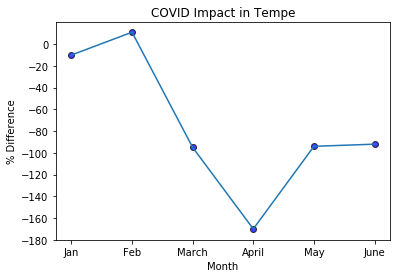

In [18]:
# COVID Impact in Tempe
x_values = Tempe_JanJun_stops_df['Month']
y_values = Tempe_JanJun_stops_df['% Difference'].str.rstrip('%').astype(float)
axisOrientation = [-20, 0, 20, 40]
plt.scatter(x_values,y_values, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.plot(x_values,y_values)
plt.title("COVID Impact in Tempe")
plt.xlabel("Month")
plt.ylabel("% Difference")
plt.yticks(np.arange(-180, 20, step=20))
plt.show()

In [19]:
# Import Mesa Jan-Jun CSV
Mesa_stops_df = pd.read_csv(r"C:\Users\crist\Desktop\group_project1\CC\MesaJanJunBusStops2020.csv","utf-8", engine='python', delimiter = ",")
Mesa_stops_df

,Month,ROUTE,CITY,Avg Full Fare,Avg Exp Fare,Avg Reduced Fare,Avg Full Fare Pass,Avg Reduced Pass,Avg Monthly Pass,Avg Free,Avg Bikes,Avg W/C,Avg Daily Boardings,Total Boardings,Daily Revenue Miles,Total Rev. Miles,Boardings Per Rev Mile,2019 - Avg Daily,% Difference
0,Jan,Valley Metro Rail,Mesa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"19,290","226,048","5,505","61,238",10.6,"16,759",46%
1,Feb,Valley Metro Rail,Mesa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"20,577","224,408","5,554","58,089",11.0,"16,735",71%
2,March,Valley Metro Rail,Mesa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"15,017","168,706","5,526","61,478",9.0,"17,294",-39%
3,April,Valley Metro Rail,Mesa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"10,526","114,029","3,040","32,277",11.0,"17,015",-113%
4,May,Valley Metro Rail,Mesa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"6,910","95,414","3,234","43,467",4.0,"11,479",-78%
5,June,Valley Metro Rail,Mesa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"6,342","90,399","3,234","43,875",4.0,"11,557",-89%


In [20]:
Mesa_JanJun_stops_df = Mesa_stops_df.drop(['Avg Full Fare', 'Avg Exp Fare', 'Avg Reduced Fare', 'Avg Full Fare Pass', 'Avg Reduced Pass', 'Avg Monthly Pass', 'Avg Free', 'Avg Bikes', 'Avg W/C', 'Boardings Per Rev Mile'], axis=1)
Mesa_JanJun_stops_df

,Month,ROUTE,CITY,Avg Daily Boardings,Total Boardings,Daily Revenue Miles,Total Rev. Miles,2019 - Avg Daily,% Difference
0,Jan,Valley Metro Rail,Mesa,"19,290","226,048","5,505","61,238","16,759",46%
1,Feb,Valley Metro Rail,Mesa,"20,577","224,408","5,554","58,089","16,735",71%
2,March,Valley Metro Rail,Mesa,"15,017","168,706","5,526","61,478","17,294",-39%
3,April,Valley Metro Rail,Mesa,"10,526","114,029","3,040","32,277","17,015",-113%
4,May,Valley Metro Rail,Mesa,"6,910","95,414","3,234","43,467","11,479",-78%
5,June,Valley Metro Rail,Mesa,"6,342","90,399","3,234","43,875","11,557",-89%


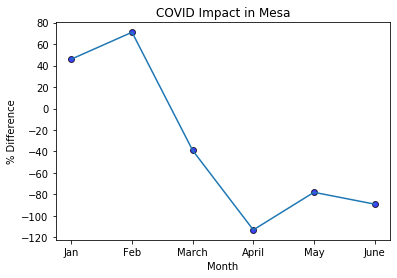

In [21]:
# COVID Impact in Mesa
x_values = Mesa_JanJun_stops_df['Month']
y_values = Mesa_JanJun_stops_df['% Difference'].str.rstrip('%').astype(float)
axisOrientation = [-20, 0, 20, 40]
plt.scatter(x_values,y_values, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.plot(x_values,y_values)
plt.title("COVID Impact in Mesa")
plt.xlabel("Month")
plt.ylabel("% Difference")
plt.yticks(np.arange(-120, 100, step=20))
plt.show()

In [22]:
# Import Phoenix Jan-Jun CSV
Phoenix_stops_df = pd.read_csv(r"C:\Users\crist\Desktop\group_project1\CC\PhoenixJanJunBusStops2020.csv","utf-8", engine='python', delimiter = ",")
Phoenix_stops_df

,Month,ROUTE,CITY,Avg Full Fare,Avg Exp Fare,Avg Reduced Fare,Avg Full Fare Pass,Avg Reduced Pass,Avg Monthly Pass,Avg Free,Avg Bikes,Avg W/C,Avg Daily Boardings,Total Boardings,Daily Revenue Miles,Total Rev. Miles,Boardings Per Rev Mile,2019 - Avg Daily,% Difference
0,Jan,Valley Metro Rail,Phoenix,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"66,349","799,409","15,805","175,822",12.6,"70,673",-18%
1,Feb,Valley Metro Rail,Phoenix,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"70,717","785,582","15,946","166,779",13.0,"70,001",5%
2,March,Valley Metro Rail,Phoenix,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"54,036","621,128","15,867","176,510",11.0,"73,828",-79%
3,April,Valley Metro Rail,Phoenix,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"34,104","367,871","8,730","92,666",12.0,"74,317",-161%
4,May,Valley Metro Rail,Phoenix,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"22,347","312,807","9,285","124,796",5.0,"47,807",-104%
5,June,Valley Metro Rail,Phoenix,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"20,937","299,800","9,285","125,964",4.0,"43,946",-103%


In [23]:
Phoenix_JanJun_stops_df = Phoenix_stops_df.drop(['Avg Full Fare', 'Avg Exp Fare', 'Avg Reduced Fare', 'Avg Full Fare Pass', 'Avg Reduced Pass', 'Avg Monthly Pass', 'Avg Free', 'Avg Bikes', 'Avg W/C', 'Boardings Per Rev Mile'], axis=1)
Phoenix_JanJun_stops_df

,Month,ROUTE,CITY,Avg Daily Boardings,Total Boardings,Daily Revenue Miles,Total Rev. Miles,2019 - Avg Daily,% Difference
0,Jan,Valley Metro Rail,Phoenix,"66,349","799,409","15,805","175,822","70,673",-18%
1,Feb,Valley Metro Rail,Phoenix,"70,717","785,582","15,946","166,779","70,001",5%
2,March,Valley Metro Rail,Phoenix,"54,036","621,128","15,867","176,510","73,828",-79%
3,April,Valley Metro Rail,Phoenix,"34,104","367,871","8,730","92,666","74,317",-161%
4,May,Valley Metro Rail,Phoenix,"22,347","312,807","9,285","124,796","47,807",-104%
5,June,Valley Metro Rail,Phoenix,"20,937","299,800","9,285","125,964","43,946",-103%


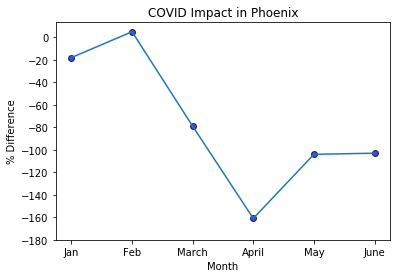

In [24]:
# COVID Impact in Phoenix
x_values = Phoenix_JanJun_stops_df['Month']
y_values = Phoenix_JanJun_stops_df['% Difference'].str.rstrip('%').astype(float)
axisOrientation = [-20, 0, 20, 40]
plt.scatter(x_values,y_values, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.plot(x_values,y_values)
plt.title("COVID Impact in Phoenix")
plt.xlabel("Month")
plt.ylabel("% Difference")
plt.yticks(np.arange(-180, 20, step=20))
plt.show()